# Parallelising Neural Network Training with Keras

<img src="./images/keras-logo.png" />

**Note**: This notebook is adapted from chapter 13 in *Python Machine Learning* book, using Keras instead of TensorFlow. This notebook contains also (many) elements of book [*Deep Learning with Python*](https://www.manning.com/books/deep-learning-with-python), chapter 3 and 4. The Keras code is stored [here](https://github.com/fchollet/deep-learning-with-python-notebooks).

## Keras

- [Keras homepage](https://keras.io/)
- Run Keras
    * locally: 
        - it is likely that your laptop doesn't have a graphical processing unit (GPU) suitable for use deep learning computations. This will result in longer training times for your model, but may be the only feasable option if you need to work offline.
        - installing all necessary components may pose problems
    * in the cloud using [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb): 
        - this requires internet connection and a Google account. 
        - You will have access to a GPU or TPU (if the software allows for use of TPU) 

## Other deep learning libraries - TensorFlow

[TensorFlow](https://www.tensorflow.org/) (by Google)
* Still one of the most used deep learning library (October 2019)
* Version 2.0 out a short while ago (10 days ago) with Keras integrated
* Version 1.X known for its poor documentation
* Version 1.X tricky to use as reported frequently
* Keras runs on top of Tensorflow (one out of currently three options)
* In this year's edition of DAT300 we will use Keras that runs on top of TensorFlow 1.X

## Other deep learning libraries - Theano

[Theano](http://deeplearning.net/software/theano/) (by [Mila](https://mila.quebec/en/) - [University of Montreal](https://www.umontreal.ca/en/))
- said to be the fastest deep learning library in Python
- development ceased in November 15, 2017
- Keras runs on top of Theano (one out of currently three options)

## Other deep learning libraries - CNTK (Microsoft Cognitive Toolkit)

[CNTK](https://www.microsoft.com/en-us/cognitive-toolkit/) (by Microsoft)
- Keras runs on top of CNTK (one out of currently three options)

## Other deep learning libraries - PyTorch

[PyTorch](https://pytorch.org/)
- based on [Torch](http://torch.ch/) (by [Facebook Artificial Intelligence Research Group](https://research.fb.com/category/facebook-ai-research/))
- is said to be more "pythonic" than TensorFlow 1.X


## Other deep learning libraries - Caffe2

[Caffe2](https://caffe2.ai/) by [University of California, Berkeley](https://bair.berkeley.edu/) and [Facebook Artificial Intelligence Research Group](https://research.fb.com/category/facebook-ai-research/)

## Other deep learning libraries - Overview on Wiki

Comparison of various deep learning libraries at [wiki](https://en.wikipedia.org/wiki/Comparison_of_deep_learning_software).

### Overview

- [For the unpatient - a quick look at a neural network built with Keras](#For-the-unpatient---a-quick-look-at-a-neural-network-built-with-Keras) - contains <font color=green>**COLAB NOTEBOOK**</font>
- [Data representations for neural networks](#Data-representations-for-neural-networks) - contains <font color=green>**COLAB NOTEBOOK**</font>
    - [Vector data](#Vector-data)
    - [Time series or sequence data](#Time-series-or-sequence-data)
    - [Image data](#Image-data)
    - [Video data](#Video-data)
- [Introduction to Keras](#Introduction-to-Keras)
    - [Binary classification - Classifying movie reviews](#Binary-classification---Classifying-movie-reviews) - contains <font color=green>**COLAB NOTEBOOK**</font>
    - [Multiclass classification - Classifying newswires](#Multiclass-classification---Classifying-newswires) - contains <font color=green>**COLAB NOTEBOOK**</font>
    - [Regression - Predciting house prices](#Regression---Predciting-house-prices) - contains <font color=green>**COLAB NOTEBOOK**</font>
- [Choosing activation functions for multilayer networks](#Choosing-activation-functions-for-multilayer-networks)
- [Overfitting and underfitting: regularisation methods for ANN](#Overfitting-and-underfitting:-regularisation-methods-for-ANN) - contains <font color=green>**COLAB NOTEBOOK**</font>
- [Summary](#Summary)

## For the unpatient - a quick look at a neural network built with Keras

* Build our first neural network using the Keras library
* More details on Keras later in this notebook
* <font color=green>**COLAB NOTEBOOK**</font>: Data used in this [first example](https://colab.research.google.com/drive/15uWcS23hf-AhnuitFpjPo_lHWL3QehJZ): MNIST data (full set) of handwritten digits

## Data representations for neural networks

* Previous example used data stored in multidimensional Numpy arrays, also called **tensors**.
* All machine learning systems use tensors as their basic data structure
* Tensors are fundamental to the field of machine learning - TensorFlow was named after them


* What are tensors?
    - tensors are *containers for data* (almost always numerical data)
    - tensors are a *generalisation of matrices* to an *arbitrary* number of dimensions
    - a *dimension* is often called an axis in the context of tensors

<font color=green>**COLAB NOTEBOOK**</font>: code on [use of tensors](https://colab.research.google.com/drive/1gzCYp-W7lkWhrRVFf8KQjEByA6lsjHBR)

### Vector data

* This is the most common case
* In such a dataset, each single data point can be encoded as a vector.
* Thus a batch of data will be encoded as a 2D tensor (array of vectors)
* 2D tensor: first axis is the *samples axis* and the second axis is the *features axis*.

#### Vector data -  Example 1

Actuarial dataset of people considering:
* persons age
* ZIP code
* income

Each person can be characterised as a vector of 3 values. A dataset of 100 000 people could be stored in a 2D tensor of shape `(100000, 3)`.

#### Vector data -  Example 2

A dataset of text documents, where each document is represented by counts of how many times each word appears in it (out of a dictionary of 20 000 common words).

* Each document can be considered as a vector of 20 000 values

If dataset consists of 500 documents, data could be stored in a 2D tensor of shape `(500, 20000)`

### Time series or sequence data

* Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an **explicit time axis**
* Each sample can be encoded as a sequence of vectors (a 2D tensor)
* Thus a batch of data will be encoded as a 3D tensor

<img src="./images/fig_2.3.png" width="350"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 2.2.10, Fig. 2.3. **A 3D timeseries data tensor**

#### Timeseries data -  Example

A dataset of stockprices:

* record current price of stock
* record highest price in past minute
* record lowest price in past minute

Given a total of 390 minutes in a trading day, the data of one trading day will be stored in a 2D tensor of shape `(390 x 3)`. If there are 250 days of trading in one year then the data may be stored in a 3D tensor of shape `(250, 390, 3)`. In this case each sample would be the data of one trading day. 

#### Sequence data -  Example

A dataset of tweets:

* encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters
* each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character)

Each tweet can be encoded as a 2D tensor of shape `(280, 128)`. Hence, a dataset of 1 million tweets can be stored in a 3D tensor of shape `(1000000, 280, 128)`.

### Image data

* Images typically have three dimensions: height, width and colour depth
* Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional color channel for grayscale images

A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape `(128, 256, 256, 1)`. A
batch of 128 color images could be stored in a tensor of shape `(128, 256, 256, 3)`.

<img src="./images/fig_2.4.png" width="400"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 2.2.11, Fig. 2.4. **A 4D image data tensor (channel-first convention)**

**Two conventions** for shapes of image tensors:
* *channel-last* convention as used by TensorFlow `(samples, height, width, color_depth)`
* *channel-first* convention as used by Theano `(samples, color_depth, height, width)`
* Either, TensorFlow or Theano, may be used as the engine for Keras

### Video data

* Video data is one of the few types of real-world data for which you’ll need 5D tensors
* A video can be understood as a sequence of frames, each frame being a color image
* Because each frame can be stored in a 3D tensor `(height, width, color_depth)`, a sequence of frames can be stored in a 4D tensor `(frames, height, width, color_depth)`
* Thus a batch of **different videos** can be stored in a 5D tensor of shape `(samples, frames, height, width, color_depth)`

#### Video data - Example

Imagine you have a video with the following properties:

* 60 second video
* 144 x 256 (height, width)
* 4 frames per second

A batch of **four** such video clips would be stored in a tensor of shape `(4, 240, 144, 256, 3)`. That’s a total of 106 168 320 values! If the `dtype` of the tensor was `float32`, then each value would be stored in 32 bits, so the tensor would represent 405 MB, which is quite a lot. Videos in real life are much lighter, because they aren’t stored in `float32`, and they’re typically compressed by a large factor (such as in the MPEG format).

## Introduction to Keras

This section covers:
* Core components of neural networks
* An introduction to Keras
* Using neural networks to solve basic classification and regression problems


* Three introductory examples of how to use neural networks to address real problems
    - Classifying movie reviews as **positive** or **negative** (binary classification)
    - Classifying news wires by **topic** (multiclass classification)
    - Estimating the **price of a house**, given real-estate data (regression)

### Anatomy of a neural network

 training a neural network revolves around the following objects:

1. **Layers**, which are combined into a network (or model)
2. The **input data** and **corresponding targets**
3. The **loss function**, which defines the feedback signal used for learning
4. The **optimizer**, which determines how learning proceeds

<img src="./images/ANN.png" width="500"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 3.1, Fig. 3.1. **Relationship between the network, layers, loss function and optimiser.**

#### Layers: the building blocks of deep learning

* Layers are a fundamental data structure in neural networks
* A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors
* The layer’s **weights**, one or several tensors learned with stochastic gradient descent, contain the network’s **knowledge**

##### Types of layers

Different layers are appropriate for different tensor formats and different types of data
processing. For instance:

* *simple vector data*, stored in 2D tensors of shape `(samples, features)`, is often processed by **densely** connected layers
    - also called **fully** connected or **dense layers**
    - represented by `Dense` class in Keras
* *sequence data*, stored in 3D tensors of shape `(samples, timesteps, features)`, is typically processed by **recurrent layers** such as an `LSTM` layer
* *Image data*, stored in 4D tensors, is usually processed by 2D **convolution layers** (`Conv2D`).

* Layers are the LEGO bricks of deep learning, a metaphor that is made explicit by frameworks like Keras
* Building deep-learning models in Keras is done by clipping together **compatible layers** to form useful **data-transformation** pipelines.
* The notion of **layer compatibility** here refers specifically to the fact that every layer will only accept **input tensors** of a **certain shape** and will return **output tensors** of a certain shape.

**Code implementation**

<img src="./images/code_01.png" width="600"/>

* Create a layer that accepts only 2D tensors (remember, that's what `Dense` layers do)
* The `Dense` layer has `32` output or activation units
* The first dimension of the 2D tensor is `784` (axis 0, the **batch dimension**, is unspecified, and thus any value would be accepted)
* This layer will return a tensor where the first dimension has been transformed to be `32`

**Code implementation**

* This first layer can only be connected to a **downstream layer** that expects *32-dimensional* vectors as its input
* With Keras, there is no reason to worry about compatibility, because the layers added to the models are **dynamically built** to **match the shape** of the **incoming layer**
* The second layer didn’t receive an input shape argument — instead, it automatically inferred its input shape as being the output shape of the layer that came before

<img src="./images/code_02.png" width="600"/>

#### Models: networks of layers

* A deep-learning model is a directed, acyclic graph of layers
* The most common instance is a linear stack of layers, mapping a single input to a single output
*  There is a broader variety of network topologies. Some common ones include the following:
    - Two-branch networks
    - Multihead networks
    - Inception blocks

* The **topology** of a network defines a **hypothesis space**
* By choosing a network topology, you **constrain** your space of possibilities (hypothesis space) to a specific **series of tensor operations**, mapping input data to output data
*  Picking the right network architecture is more an **art** than a **science**
*  Although there are some best practices and principles you can rely on, **only practice** can help you become a proper neural-network architect

#### Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, there are two more things that need to be defined.

* **Loss function** (**objective function**): the quantity that will be minimized during training. It represents a measure of success for the task at hand
* **Optimizer**: determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD)

Choosing the right objective function for the right problem is extremely important: the network will take any shortcut it can, to minimize the loss. If the objective doesn’t fully correlate with success for the task at hand, your network will end up
doing things you may not have wanted. 

For common problems such as classification, regression and sequence prediction, there are simple guidelines one can follow to choose the correct loss. For instance:

* **binary crossentropy** for a **two-class classification** problem
* **categorical crossentropy** for a **many-class classification** problem
* **mean squared error** for a **regression** problem
* **connectionist temporal classification (CTC)** for a sequence-learning problem
* etc.

Only when working on truly new research problems one will have to develop own objective functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks. 

### Key features of Keras

Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model. It has the following key features:

* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

#### Keras, TensorFlow, Theano, and CNTK

Several different backend engines can be plugged seamlessly into Keras. Currently, the three existing backend implementations
are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive Toolkit (CNTK) backend. In the future, it’s likely that Keras will be extended to work with even more deep-learning execution engines

<img src="./images/fig_3.3.png" width="600"/>

[1] *F. Chollet*, Deep Learning with Python, chapter 3.2.1, Fig. 3.3. **The deep learning software and hardware stack**

**About the software and hardware stack**

* TensorFlow, CNTK, and Theano are some of the primary platforms for deep learning today
* Any piece of code that you write with Keras can be run with any of these backends without having to change anything in the code: you can seamlessly switch between the two during development
* It is recommended to use the TensorFlow backend as the default for most of deep-learning needs, because it’s the most widely adopted, scalable, and production ready
* Via TensorFlow (or Theano, or CNTK), Keras is able to run seamlessly on both CPUs and GPUs
* When running on CPU, TensorFlow is itself wrapping a low-level library for tensor operations called Eigen (http://eigen.tuxfamily.org)
* On GPU, TensorFlow wraps a library of well-optimized deep-learning operations called the NVIDIA CUDA Deep Neural Network library (cuDNN


### Keras workflow

In the MNIST example we have already built our first Keras model. The general workflow is constructed like this: 

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the `fit()` method of your model

**Defining a Keras model**

There are two ways to define a Keras model:

1. using the `Sequential` class (only for linear stacks of layers, which is the most common network architecture by far)
2. using the *functional* API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures)

Here’s a two-layer model defined using the `Sequential` class

<img src="./images/code_03.png" width="800"/>

And here’s the same model defined using the *functional* API.

<img src="./images/code_04.png" width="800"/>

With the *functional* API, one can manipulate the data tensors that the model processes and applying layers to this tensor as if they were functions.

Once your model architecture is defined, it doesn’t matter whether you used a `Sequential` model or the functional API. All of the following steps are the same. The learning process is configured in the compilation step, where you specify:

* the optimiser for the model
* the loss function for the model
* the metrics to be monitored

Here’s an example with a single loss function, which is by far the most common case:

<img src="./images/code_05.png" width="800"/>

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the `fit()` method, similar to what you would do in Scikit-Learn and several other machine-learning libraries:

<img src="./images/code_06.png" width="800"/>

Over the next few chapters, you’ll build a solid intuition about what type of network architectures work for different kinds of problems, how to pick the right learning configuration, and how to tweak a model until it gives the results you want to see. We’ll look at three basic examples in sections: 

* a two-class classification example
* a many-class classification example 
* a regression example

### Binary classification - Classifying movie reviews

Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

<font color=green>**COLAB NOTEBOOK**</font>: [Classifying movie reviews](https://colab.research.google.com/drive/1RNuKu22xavwkTB8FIVrsPMqbQFZXm1vZ)

### Multiclass classification - Classifying newswires

<font color=green>**COLAB NOTEBOOK**</font>: [Classifying newswires](https://colab.research.google.com/drive/1Lpo0RoaYmKsjaYCU8ICW2NLsLBNx3MQ6)

### Regression - Predciting house prices

<font color=green>**COLAB NOTEBOOK**</font>: [Predicting house prices](https://colab.research.google.com/drive/1IN1DmVEnx_mHgexOzR2Zyu6WbzWKZT5N)

## Choosing activation functions for multilayer networks

* Technically, one can use **any function** as an activation function in multilayer neural networks as long as it is **differentiable**
* One could can even use **linear** activation functions, such as in Adaline, but ...
    - would **not** be very useful to use linear activation functions for both hidden and output layers 
    - to tackle complex problems one needs to introduce **non-linearity**
    - the **sum of linear functions** would yield only **another** linear function

* The **logistic activation function** (which we often called *sigmoid function*) mimics the concept of a neuron in a brain most closely - think of it as the probability of whether a neuron fires or not
* However, logistic activation functions can be problematic
    - When net input $\textbf{z}$ is **highly negative**, $\phi{(\textbf{z})}$ would be close to zero
    - If $\phi{(\textbf{z})}$ is close to zero the neural network would learn **very slowly**
    - More slowly learning could lead to the neural network **getting trapped in local minima** during traning
    - Activation function alternatives are available [further below](#An-overview-of-various-activation-functions)

### Logistic function recap

* The **logistic function** is a special case of a **sigmoid function**
* We can use a logistic function to model the probability that sample $\textbf{x}$ belongs to the positive class (class 1) in a **binary classification** task
* The net input $z$ is shown in the following equation:

<img src="./images/netInputZ.png" width="800"/>

The logistic function will compute the following:

<img src="./images/phiOfZ.png" width="400"/>

#### Example using two-dimensional data

In [1]:
# Import necessary modules
import numpy as np

# Generate some two-dimensional data including bias and weight vector w
X = np.array([1, 1.4, 2.5]) ## first value must be 1, since it represents bias
w = np.array([0.4, 0.3, 0.5])

# Define function for computation of net input z
def net_input(X, w):
    return np.dot(X, w)

# Define logistic function
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define phi(z) activation function
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

# Compute probability of x belonging to positive class (y = 1)
print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


However, an output layer consisting of **multiple logistic activation units** does not produce meaningful, interpretable probability values. This is illustrated by code below:

In [4]:
# W : array with shape = (n_hidden_units + 1, n_output_units)
#     note that the first row are the bias units
W = np.array([[1.1, 0.2, 0.6],
              [1.2, 0.4, 1.5],
              [0.8, 1. , 1.2],
              [0.4, 0.2, 0.7]])

# A : data array with shape = (n_samples, n_hidden_units + 1)
#     note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])

# Compute net input Z and probabilities 
Z = np.dot(A, W)
y_probas = logistic(Z)

print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [[1.78 0.76 1.65]]
Output Units:
 [[0.85569687 0.68135373 0.83889105]]


* The resulting values **cannot** be interpreted as **probabilities** for a three-class problem
* The reason for this is that they **do not** sum up to 1
* Usually, this is not of concern when we use the model to predict class membership
* One to predict class membership is to assign sample to **maximum value** of $\textbf{Z}$

In [3]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

TypeError: %d format: a number is required, not numpy.ndarray

* In certain contexts, it can be useful to compute meaningful class probabilities for multiclass predictions 
* In the next section, we will take a look at a **generalization** of the logistic function, the ``softmax`` function, which can help us with this task

### Estimating class probabilities in multiclass classification via the ``softmax`` function

* In previous sections: obtain a class label using the ``argmax`` function
* The ``softmax`` function is in fact a soft form of the ``argmax`` function; instead of giving a single class index, it provides the **probability of each class**
* The ``softmax`` function allows for computation of **meaningful** class probabilities in **multiclass** settings (multinomial logistic regression)

In ``softmax``, the probability of a particular sample with net input $z$ belonging to the $i$th class can be computed with a normalization term in the denominator, that is, the sum of all $M$ linear functions.

<img src="./images/softmax_eq.png" width="500"/>

The ``softmax`` function coded in Python:

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

In [ ]:
np.sum(y_probas)

In [ ]:
np.argmax(y_probas)

* The predicted class label is the same as when we applied the ``argmax`` function to the logistic output
* Intuitively, it may help to think of the ``softmax`` function as a *normalized* output that is useful to obtain meaningful **classmembership predictions** in multiclass settings

### Broadening the output spectrum using a hyperbolic tangent

* Another *sigmoid function* that is often used in the **hidden layers** of artificial neural networks is the **hyperbolic tangent** (commonly known as ``tanh``)
* ``tanh`` can be interpreted as a rescaled version of the logistic function

<img src="./images/log_&_tanh.png" width="700"/>


**Advantage of the hyperbolic tangent over the logistic function**

* It has a **broader output spectrum** and ranges in the **open interval** (-1, 1)
* This can improve the convergence of the back propagation algorithm [Neural Networks for Pattern Recognition, C. M. Bishop, Oxford University Press, pages: 500-501, 1995](https://www.microsoft.com/en-us/research/wp-content/uploads/1996/01/neural_networks_pattern_recognition.pdf)
* In contrast, the logistic function returns an output signal that ranges in the open interval (0, 1)

For an intuitive comparison of the logistic function and the hyperbolic tangent, let's plot the two sigmoid functions:

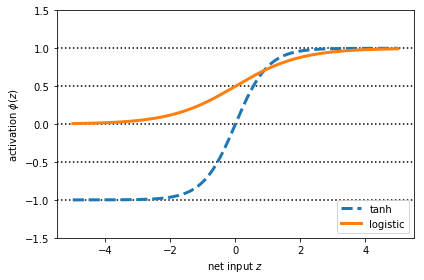

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
         linewidth=3, linestyle='--',
         label='tanh')

plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('images/13_03.png')
plt.show()

* The shapes of the two sigmoidal curves look very similar
* however, the ``tanh`` function has 2× larger output space than the ``logistic`` function

* Note that we implemented the ``logistic`` and ``tanh`` functions verbosely for the purpose of illustration
* In practice, we can use NumPy's ``tanh`` function to achieve the same results:

In [ ]:
tanh_act = np.tanh(z)

In addition, the logistic function is available in SciPy's special module:

In [ ]:
from scipy.special import expit
log_act = expit(z)

### Rectified linear unit activation

* ``tanh`` and ``logistic`` activations suffer from **vanishing gradient problem**
* This means the **derivative of activations** with respect to net input **diminishes** as $z$ becomes large
* As a result, **learning weights during the training phase** become **very slow** because the gradient terms may be **very close to zero**
* ReLU activation addresses this issue

#### **Example**

* Initial net input $z_{epoch1} = 20$
* After weight update net input changes to $z_{epoch2} = 25$
* Using ``tanh`` as activation function we get $\phi{(z_{epoch1})} \approx 1.0$ and $\phi{(z_{epoch2})} \approx 1.0$

* This means the **derivative of activations** with respect to net input **diminishes** as $z$ becomes large
* As a result, learning weights during the training phase become **very slow** because the **gradient terms** may be **very close to zero**

Mathematically, ReLU is defined as follows:

<img src="./images/relu.png" width="400"/>

* ReLU is still a nonlinear function that is good for learning complex functions with neural networks
* Besides this, the derivative of ReLU, with respect to its input, is always 1 for positive input values
* Therefore, it **solves** the problem of vanishing gradients, making it **suitable for deep neural networks**

### An overview of various activation functions

<img src="./images/overview_actfunc.png" width="600"/>

For more on activation functions in neural networks, read [here](https://isaacchanghau.github.io/post/activation_functions/). (not syllabus)

## Loss function: Cross entropy

* Cross entropy loss, or log loss, measures the **performance of a classification model** whose output represents a **probability**, that is, a value between 0 and 1. 
* Cross entropy loss **increases** as the predicted probability **diverges** from the actual label. So predicting a probability of for example .017 when the actual observation label is 1 would result in a **high** loss value. 
* A perfect model would have a log loss of 0. 



**Choice of cross entropy in Keras**

* Binary classification problems: use binary cross entropy (``binary_crossentropy`` in Keras)
* Multi-class classification problems: use categorical cross entropy (``categorical_crossentropy`` in Keras)

### Binary cross entropy

<img src="./images/binary_logloss.png" width="700"/>

Text(0,0.5,'log loss')

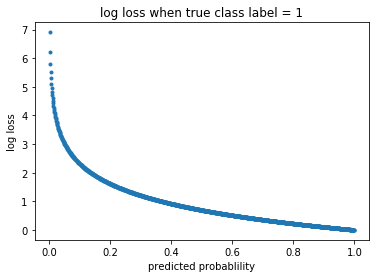

In [6]:
# Import modules
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline


# Define binary cross entropy
def binary_crossEntropy(yHat, y):
    term_1 = y * m.log(yHat)#; print(term_1)
    term_2 = (1 - y) * m.log(1 - yHat)#; print(term_2)
    
    return -(term_1 + term_2)

# Get values between 0 and 1 representing probabilities for which
# we will compute log loss for
values = np.linspace(0.001, .999, 999)

# Compute log losses
logloss = []
for val in values:
    logloss.append(binary_crossEntropy(val, 1))

# Plot log loss, given that true class label is 1
plt.plot(values, logloss, '.')
plt.title("log loss when true class label = 1")
plt.xlabel("predicted probablility")
plt.ylabel("log loss")

### Categorical cross entropy

<img src="./images/categorical_logloss.png" width="600"/>

<img src="./images/cross_entropy.png" width="900"/>

In [10]:
# Import modules
import numpy as np

# Define categorical cross entropy
def categorical_crossEntropy(yHat, y):
    return - np.sum(y * np.log(yHat))

# Define some toy data
y_pred = np.array([0.05, 0.9, 0.05])
y = np.array([0, 1, 0])

# Compute cross entropy
r2 = categorical_crossEntropy(y_pred, y)
print(r2)

0.10536051565782628


<img src="./images/categorical_logloss.png" width="600"/>

## Overfitting and underfitting: regularisation methods for ANN

<font color=green>**COLAB NOTEBOOK**</font>: [Regularisation in Keras](https://colab.research.google.com/drive/1Da_aRUmjdPUTOgWXfnVIcr5l9HAiIIWz)

## Summary

Things you have learned in this series of lectures

* Overview over different deep learning tools in using Python
* Basic anatomy/architecture of ANN
* How to build and train models for 
    * binary and multiclass classification
    * regression with few samples using KFold cross validation
* Choose appropriate activation functions for specific problems
* Basic preprocessing of text data
* Regularisation methods for ANN